SimpleITK is a extensively used package for processing medical images and handles file IO and standard processing particularly well.

The Kaggle Kernels did not support SITK so the initial submissions wouldn't work with SimpleITK, but they newer ones now have an improved Docker image (https://github.com/Kaggle/docker-python/pull/58)

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import SimpleITK as sitk
from glob import glob
from skimage.util import montage as montage2d
import matplotlib.pyplot as plt
def safe_sitk_read(folder_name, *args, **kwargs):
    """
    Since the default function just looks at images 0 and 1 to determine slice thickness
    and the images are often not correctly alphabetically sorted
    :param folder_name: folder to read
    :return:
    """
    dicom_names = sitk.ImageSeriesReader().GetGDCMSeriesFileNames(folder_name)
    return sitk.ReadImage(dicom_names, *args, **kwargs)
def sitk_to_np(in_img):
    # type: (sitk.Image) -> Tuple[np.ndarray, Tuple[float, float, float]]
    return sitk.GetArrayFromImage(in_img), in_img.GetSpacing()

In [10]:
patient_folders = glob('../input/second-annual-data-science-bowl/train/train/1/study/*')
print(patient_folders)
first_pat = safe_sitk_read(patient_folders[0])
pat_img, pat_spc = sitk_to_np(first_pat)

['../input/second-annual-data-science-bowl/train/train/1/study/sax_13', '../input/second-annual-data-science-bowl/train/train/1/study/sax_16', '../input/second-annual-data-science-bowl/train/train/1/study/sax_7', '../input/second-annual-data-science-bowl/train/train/1/study/sax_6', '../input/second-annual-data-science-bowl/train/train/1/study/2ch_21', '../input/second-annual-data-science-bowl/train/train/1/study/sax_38', '../input/second-annual-data-science-bowl/train/train/1/study/sax_10', '../input/second-annual-data-science-bowl/train/train/1/study/sax_11', '../input/second-annual-data-science-bowl/train/train/1/study/sax_12', '../input/second-annual-data-science-bowl/train/train/1/study/4ch_20', '../input/second-annual-data-science-bowl/train/train/1/study/sax_8', '../input/second-annual-data-science-bowl/train/train/1/study/sax_14', '../input/second-annual-data-science-bowl/train/train/1/study/sax_57', '../input/second-annual-data-science-bowl/train/train/1/study/sax_5', '../input

In [11]:
pat_spc

(1.5625, 1.5625, 1.0)

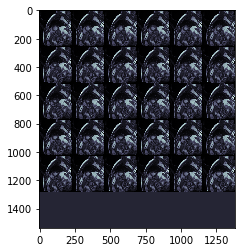

In [12]:
%matplotlib inline
plt.imshow(montage2d(pat_img), cmap = 'bone')